<a href="https://colab.research.google.com/github/lauralpezb/ML_Pipeline/blob/main/MLPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

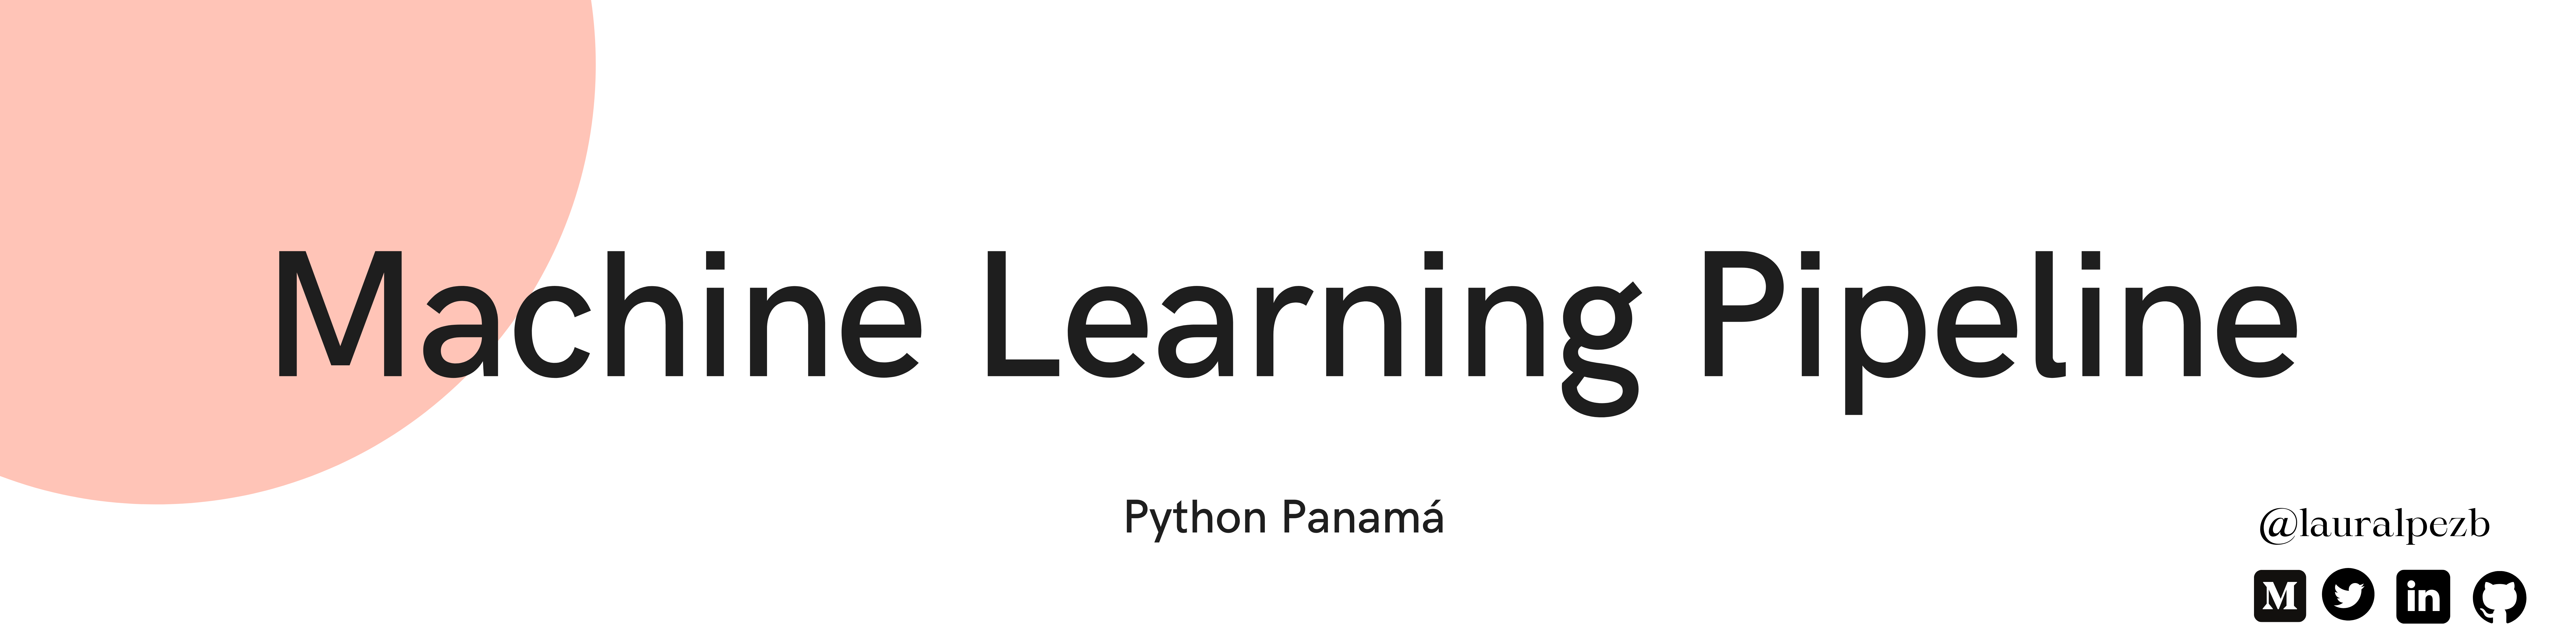

In [ ]:
from IPython.display import Image
Image(filename='Banners.png')

# Importar librerias

In [ ]:
# Instalar librerías
!pip install --upgrade category_encoders

     |████████████████████████████████| 86 kB 3.2 MB/s 


In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline

# Modelos
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Exploración de datos

In [ ]:
# Leer datos
train_data = pd.read_csv('https://raw.githubusercontent.com/abhishekshakya/BigMart-Sales-Prediction-using-Artificial-Neural-Networks/master/train_kOBLwZA.csv')

# Ejemplo de los datos
train_data.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7268,FDZ51,NaN,Regular,0.054289,Meat,96.6094,OUT027,1985,Medium,Tier 3,Supermarket Type3,2189.8162
2031,FDD47,7.60,Regular,0.142384,Starchy Foods,172.3448,OUT035,2004,Small,Tier 2,Supermarket Type1,2556.6720
740,FDF40,20.25,Regular,0.022639,Dairy,248.4092,OUT017,2007,NaN,Tier 2,Supermarket Type1,2241.0828
4917,FDS55,7.02,Low Fat,0.081290,Fruits and Vegetables,147.3734,OUT049,1999,Medium,Tier 1,Supermarket Type1,2524.0478


In [ ]:
# Tamaño de la base
train_data.shape

(8523, 47)

In [ ]:
# Identificar cantidad de nulos
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Preprocesamiento de datos

Imputar valores nulos

In [ ]:
# Imputar valores nulos con la media
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)

# Imputar valores nulos con la moda
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

Datos categóricos

In [ ]:
# Validar tipos de datos
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Columnas categóricas:
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [ ]:
# Crear objeto OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)

# Codificar variables categóricas
train_data = OHE.fit_transform(train_data)

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


Escalar los datos

In [ ]:
# Crear objeto StandardScaler
scaler = StandardScaler()

# Entrenar con la columna Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

# Aplicar a los datos
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


Construir modelo

In [ ]:
# Dividir X y Y 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# Tomar muestra de entrenamiento y prueba
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

# Validar tamaño de las muestras
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [ ]:
# Crear objeto LinearRegression
model_LR = LinearRegression()

# Entrenar modelo con datos de entrenamiento (Train)
model_LR.fit(train_x, train_y)

# Predecir los valores utilizando datos de entrenamiento y prueba
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Evaluar modelo con Mean Squared Error
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1120.4043333290308
RMSE on test data:  1148.7858907398263


In [ ]:
# Crear objeto RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# Entrenar modelo
model_RFR.fit(train_x, train_y)

# Predecir valores
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Evaluar modelo con Mean Squared Error
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  893.0310261635871
RMSE on test data:  1116.4606870672349


Selección de variables

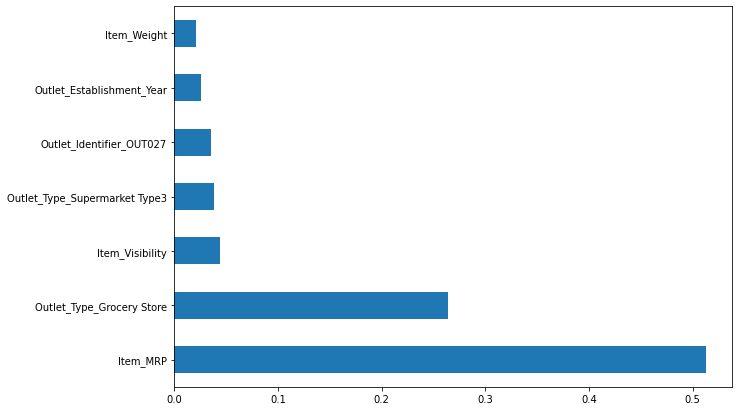

In [ ]:
# Grafica de las 7 variables más importantes 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [ ]:
# Datos de entrenamiento con las 7 variables
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# Datos de prueba con las 7 variables
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# Crear objeto RandfomForestRegressor
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# Entrenar modelo
model_RFR_with_if.fit(train_x_if, train_y)

# Predecir valores
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Evaluar modelo con Mean Squared Error
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.8582438552843
RMSE on test data:  1117.7016540152065


# Construyamos el Pipeline!

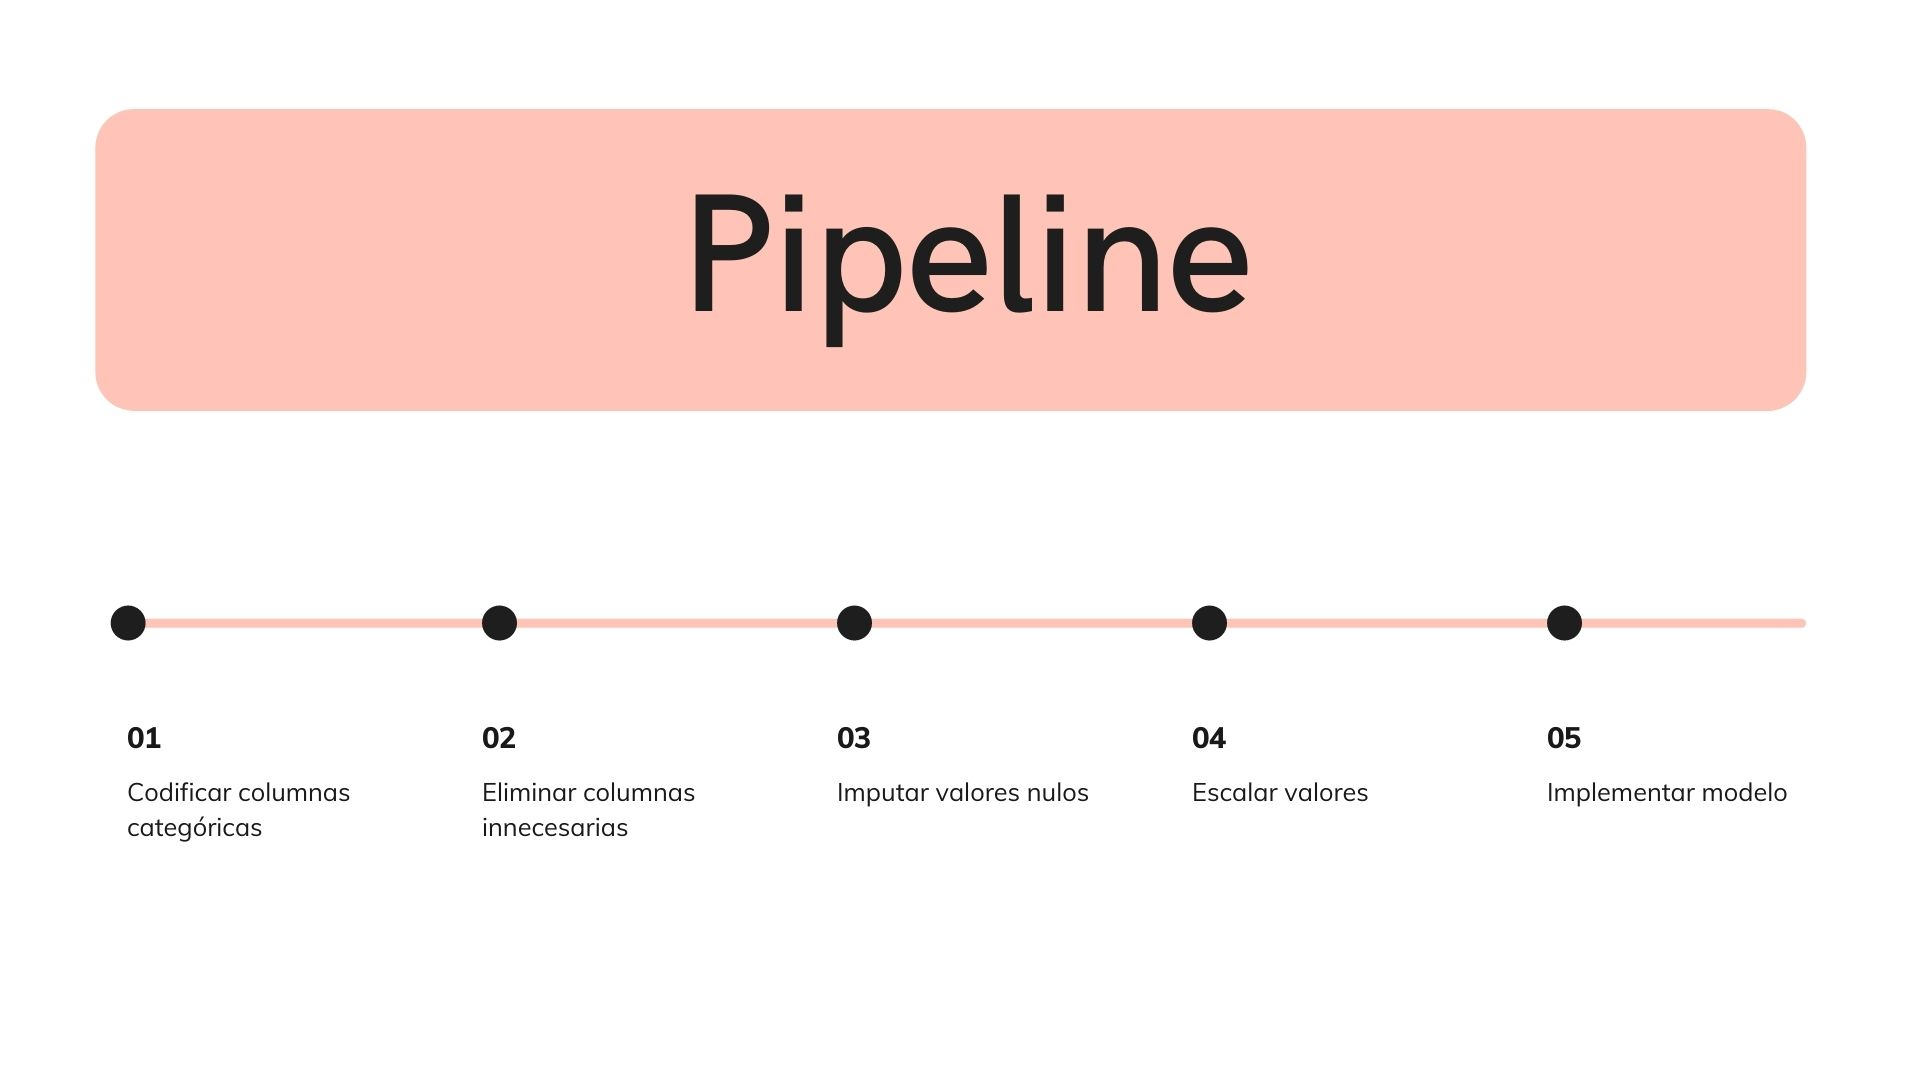

In [ ]:
from IPython.display import Image
Image(filename='Pipeline.jpg')

In [ ]:
# Importar librerias
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [ ]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/abhishekshakya/BigMart-Sales-Prediction-using-Artificial-Neural-Networks/master/train_kOBLwZA.csv')

# Definir X y Y
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

In [ ]:
train_x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
train_y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Definir la clase OutletTypeEncoder
# Transformará las columnas categoricas
# Debe tener métodos fit y transform

class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

In [ ]:
# Pasos de Preprocesamiento
# Eliminar columnas 
# Imputar valores nulos
# Escalar los datos
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

In [ ]:
# Definir Pipeline
"""
Step1: Obtener columnas categoricas codificadas
Step2: preprocesamiento
Step3: Entrenar modelo Random Forest 
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# Entrenar el Pipeline
model_pipeline.fit(train_x,train_y)

# Predecir con los datos de entrenamiento
model_pipeline.predict(train_x)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

In [ ]:
# Leer datos de prueba
test_data = pd.read_csv('https://raw.githubusercontent.com/abhishekshakya/BigMart-Sales-Prediction-using-Artificial-Neural-Networks/master/test_t02dQwI.csv')

# Predecir con los datos de prueba
model_pipeline.predict(test_data)

array([1646.0548363 , 1305.4298012 ,  658.42325097, ..., 1848.60226305,
       3959.67937864, 1384.01466986])

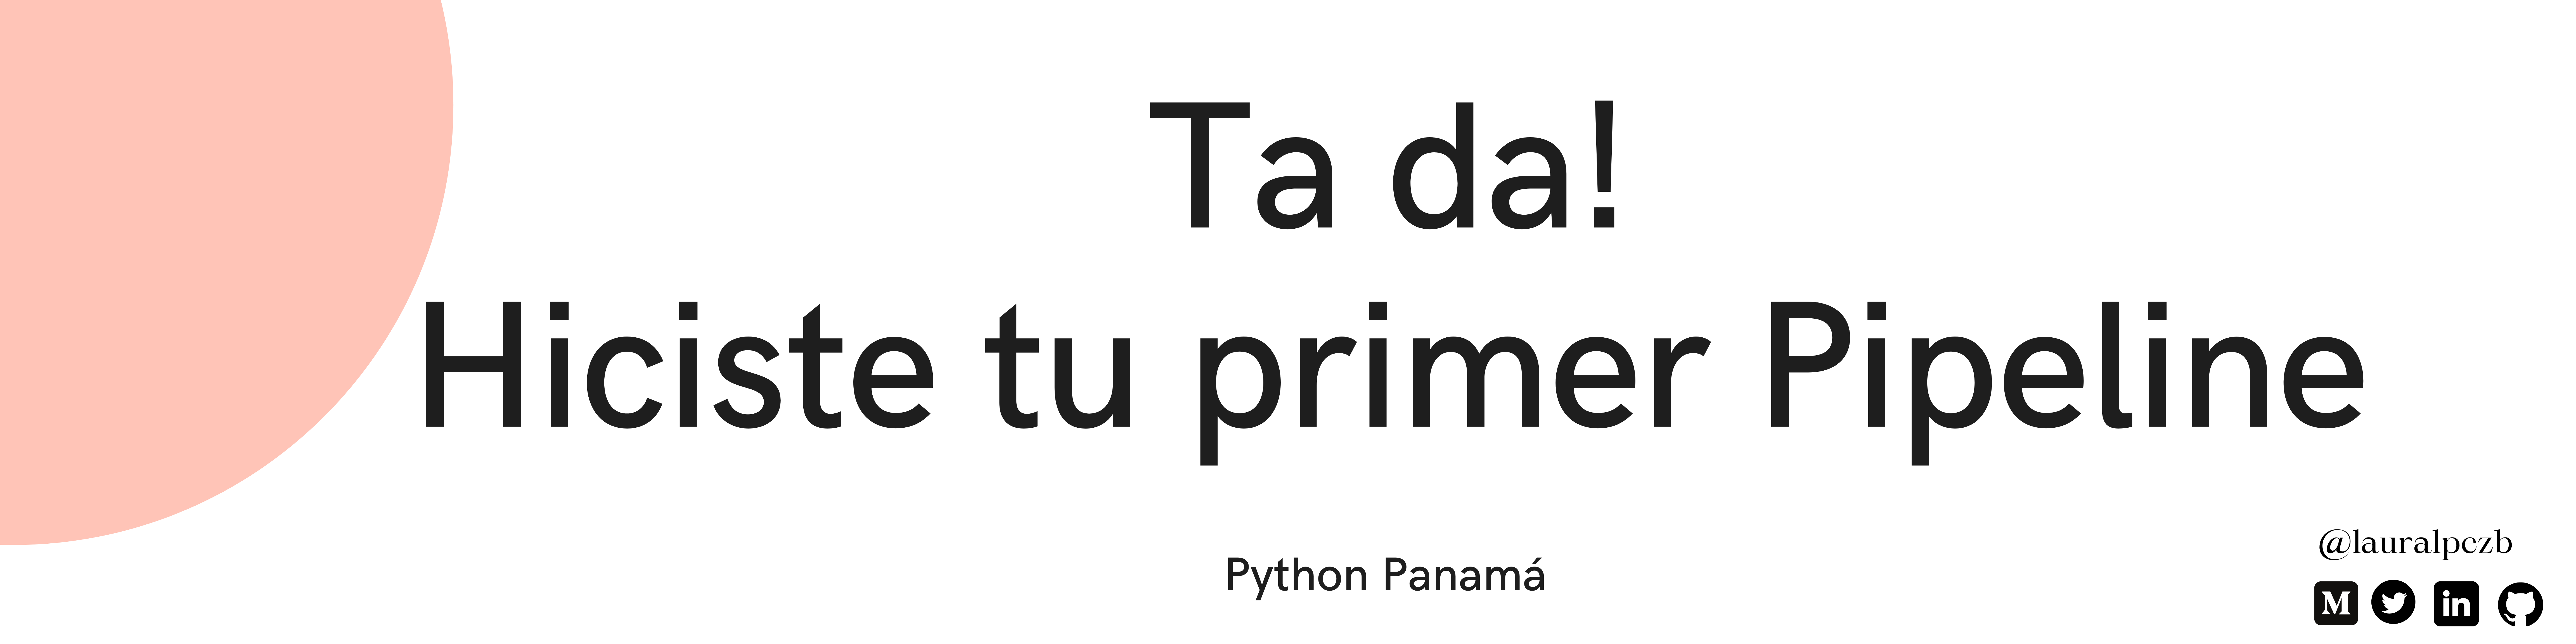

In [ ]:
from IPython.display import Image
Image(filename='Banners (2).png')